In [ ]:
import pandas as pd
from scipy.stats import norm
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [ ]:
# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Criando uma variável com o id do Arquivo no Google Drive
data_google_id = '1mNmg2mCoht-P8UNuRMYpcdCwfe5epweB'

## Fazendo o download do arquivo no Google Drive
gdd.download_file_from_google_drive(file_id=data_google_id, # file_id deve receber o id do seu arquivo no Google Drive
                                    dest_path = './dados_google_drive.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado dados.csv
                                    showsize = True)
# Carregando o arquivo numa nova variavel:
dados = pd.read_csv("dados_google_drive.csv", sep = ',')

0.0 B Done.


# Teorema do Limite Central

Vamos verificar o teorema do limite central usando Python. Iremos criar uma lista para armazenar 10000 médias de números aleatórios gerados num intervalo de 1 até 20 usando o `random.randint(1,20)` do Python.

In [ ]:
lista_medias = []
for i in range(0, 10000, 1):
  soma = 0
  for j in range(0, 100, 1):
    soma = soma + random.randint(0,21)
  media = soma/100
  lista_medias.append(media)
len(lista_medias)

10000

<Axes: ylabel='Count'>

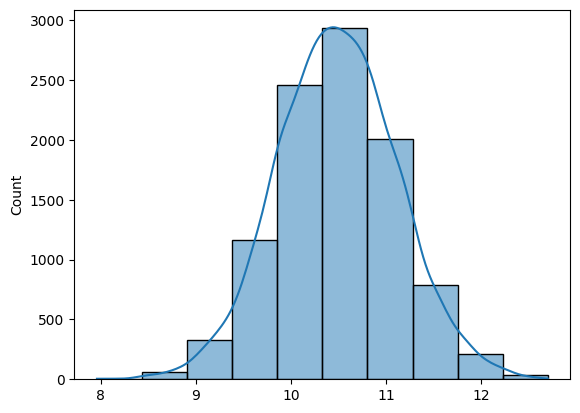

In [ ]:
sns.histplot(lista_medias, bins = 10, kde=True)

Como podemos observar a distribuição das 10000 médias segue uma **distribuição normal!**

# Teste de hipóteses

## Exemplo 1)

Vamos estudar uma seguinte Hipotese nula:

$H_{0}$: Em média o salario dos desenvolvedores nos EUA é de $80000,00 por ano

1. Definir o tamanho da sua **amostra**(a partir do conjunto de dados)
2. Coletar os dados (Já pegamos um conjunto de dados pronto para isso)

In [ ]:
dados.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [ ]:
n = dados.shape[0]
n

30

3. Obter a média e o desvio padrão

In [ ]:
media = dados['Salary'].mean()
desv_pad = dados['Salary'].std()
print(media, desv_pad)

76003.0 27414.4297845823


**Reflexão:** Porque não podemos parar por aqui os nossos estudos já que a média obtida é menor do que o valor da hipotese nula $H_{0}$?

Não podemos refutar apenas com essa média, pois não estamos trabalhando com dados de toda a população de desenvolvedores, mas sim com uma amostra. O teste de hipóteses irá nos dar a resposta para essa pergunta!

4. Hipotese nula e alternativa:


$H_{0}$: Em média o salario dos desenvolvedores nos EUA é de $80000,00 por ano

$H_{n}$: Em média o salario dos desenvolvedores nos EUA é menor do que $80000,00

5. Definir seu $\alpha$:

In [ ]:
alpha = 0.05

6. Padronizar os seus dados para gerar a estatística de teste:

No caso da média temos

$Z= \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$


In [ ]:
z = (media-80000)/((desv_pad)/(n**0.5))
z

-0.7985747212511303

Como temos o valor de z, podemos usar o `norm.cdf()` com média igual a 0 e desvio padrão igual a 1, pois já temos o valor de z para a distribuição normal padrão

In [ ]:
z = (media-80000)/((desv_pad)/(n**0.5))
z
vp = norm.cdf(z,0,1)
vp
if(vp >=alpha):
  print("Não rejeito a hipotese numa")
else:
  print("Rejeita a hipotese nula")

Não rejeito a hipotese numa


7. Comparar com o valor de α
8. Emitir o resultado do teste


In [ ]:
if(vp >=alpha):
  print("Não rejeito a hipotese numa")
else:
  print("Rejeita a hipotese nula")

Não rejeito a hipotese numa


**Exercicio**

Valor-p significantemente menor do que o alpha. Logo o teste de hipotese nos deu evidencias de que a média salarial de desenvolvedores não é de $100000/ano

$H_{0}$: Em média o salario dos desenvolvedores nos EUA é de $100000,00 por ano

 Hipotese nula e alternativa:


$H_{0}$: Em média o salario dos desenvolvedores nos EUA é de $100000,00 por ano

$H_{n}$: Em média o salario dos desenvolvedores nos EUA é menor do que $100000,00

In [ ]:
n = dados.shape[0]
n

30

In [ ]:
media = dados['Salary'].mean()
desv_pad = dados['Salary'].std()
print(media, desv_pad)

76003.0 27414.4297845823


In [ ]:
alpha = 0.05

In [ ]:
z1 = (media-100000)/((desv_pad)/(n**0.5))
z1

-4.794445230388635

In [ ]:
vp1 = norm.cdf(z1,0,1)
vp1

8.156281115164255e-07

In [ ]:
if(vp1>=alpha):
  print("Não rejeito a hipotese numa")
else:
  print("Rejeita a hipotese nula")

Rejeita a hipotese nula


## Exemplo 2)

Vamos estudar uma seguinte Hipotese nula:

$H_{0}$: Afirma-se que nos EUA é 75% dos desenvolvedores tem a idade abaixo de 30 anos.

Do exemplo anterior:

1. Definir o tamanho da sua **amostra**(a partir do conjunto de dados)
2. Coletar os dados (Já pegamos um conjunto de dados pronto para isso)
3. Obter a média e o desvio padrão

In [ ]:
n = dados.shape[0]
n

30

4. Hipotese nula e alternativa:


$H_{0}$: Afirma-se que nos EUA 75% dos desenvolvedores tem a idade abaixo de 30 anos.

$H_{n}$:  Afirma-se que nos EUA menos de 75% dos desenvolvedores tem a idade abaixo de 30 anos.

Encontrando a proporção de pessoas nas amostras coletadas

In [ ]:
mask = dados['Age']<30
prop = dados[mask].shape[0]/dados.shape[0]
prop

0.6666666666666666

5. Definir seu $\alpha$:

In [ ]:
alpha = 0.05

6. Padronizar os seus dados para gerar a estatística de teste:

No caso da proporção temos:

$P=\frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}(1-p_{0})}{n}}}$

In [ ]:
p = (prop-0.75)/(((0.75*(1-0.75))/(n))**0.5)
p

-1.0540925533894603

In [ ]:
vp2 = norm.cdf(p,0,1)
vp2

0.1459202725718941

7. Comparar com o valor de α
8. Emitir o resultado do teste


In [ ]:
if(vp2>=alpha):
  print("Não rejeito a hipotese numa")
else:
  print("Rejeita a hipotese nula")

Não rejeito a hipotese numa


Novamente rejeitamos a hipotese nula que haviamos proposto com um conjunto de dados e usando a estatística como base.

# Teste de Shapiro-Wilk

Vamos verificar o teste de Shapiro-Wilk para o seguinte cenário:

$H_{0}$: A coluna de idade está com os dados normalmente distribuídos

Primeiro iremos plotar o histograma das idades:

<Axes: xlabel='Age', ylabel='Count'>

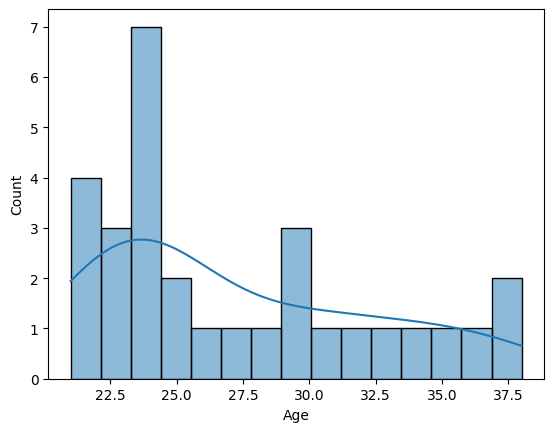

In [ ]:
sns.histplot(dados['Age'], bins=15
             , kde=True)

Visualmente temos que esses dados não estão normalmente distribuídos. Entretanto vamos checar isso com o teste de Shapiro-Wilk, lembrando que:

*   valor de p<=0,05: Os dados não estão normalmente distribuídos
*   valor de p>0,05: Os dados estão normalmente distribuídos.



Para fazermos isso iremos usar o `stats.shapiro()` para obter o resultado do teste de hipóteses:

In [ ]:
dados.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [ ]:
_,p_value = stats.shapiro(dados['Age'])
p_value

0.005003355909138918

In [ ]:
if(p_value<=0.05):
  print("Curva Não Normal")
else:
  print('Curva Normal')

Curva Não Normal


O resultado `statistic` é a estatística do quão próximo o valor pode estar de uma distibuição normal, mas não é ele que analisamos. Para sabermos se os dados estão normalmente distribuídos analisamos o `pvalue` retornado pelo `stats.shapiro()`

Como o valor de p (ou *p value*) é menor ou igual a 0,05, logo os dados não estão normalmente distribuídos e não podemos fazer análises usando os conceitos dessa distribuição de dados.

# Exercício

## Recebendo os dados do exercício:

In [ ]:
# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Criando uma variável com o id do Arquivo no Google Drive
data_google_id = '1_7GFp3cYns88mQRmeicU3J29j1vvbVcy'

## Fazendo o download do arquivo no Google Drive
gdd.download_file_from_google_drive(file_id=data_google_id, # file_id deve receber o id do seu arquivo no Google Drive
                                    dest_path = './dados_exercicio.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado dados.csv
                                    showsize = True)
# Carregando o arquivo numa nova variavel:
dados = pd.read_csv("dados_exercicio.csv", sep = ',')

0.0 B Done.


In [ ]:
dados.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


----------------------
**Botânica: Íris Dataset**

Esse dataset contém medidas da largura e comprimento da pétala e da sépala de **150 amostras** de flores, assim como a espécie de cada uma (*versicolor*, *setosa*, *virginica*). Mais informações: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="dieta" width="600px">

## Análise Exploratória dos dados com Teste de Hipoteses:

**Verificar na preparação dos dados:**

*   Quantas linhas e colunas temos nos nossos dados
*   Tipos de dados de cada coluna
*   Checar por valores nulos
*   Remover a coluna Id do conjunto de dados

**Análise exploratória:**
*   Fazer gráficos de dispersão dos dados (todos os pares possíveis) destacando com cores diferentes cada uma das espécies das plantas
*   Fazer os histogramas das 4 medidas das plantas
*   Obter a média e o desvio padrão de cada uma das colunas dos dados
*   Checar com o boxplot se temos a presença de pontos discrepantes (*outliers*)


**Teste de Hipóteses:**
Esse conjunto de dados trata-se de uma amostra de 150 plantas. Logo qualquer hipótese que tivermos sobre ele é necessário aplicar um teste de hipóteses para validá-lo. Vamos analisar os seguintes cenários:
*   Fazer o teste para verificar se a média do "Petal Length Cm" é igual a 3,06. Hipotese nula e alternativa:
  * $H_{0}$: Em média o "Petal Length Cm" é igual a 3.76
  * $H_{a}$: Média é diferente de 3,76

(Caso bilateral - ver slides para checar como fazer esse teste de hipóteses)
*   Fazer o teste para verificar se 75% das plantas tem o "Petal Length Cm" menor que 5,1 cm (Teste de proporção). Hipotese nula e alternativa:
   * $H_{0}$: 75% das plantas tem o "Petal Length Cm" menor que 5,1 cm (Teste de proporção)
   * $H_{a}$: Menos de 75% das plantas tem o "Petal Length Cm" menor que 5,1 cm (Teste de proporção)

*   Testar com o teste de Shapiro-Wilk se os dados de cada uma das 4 medidas das plantas estão normalmente distribuídas.




**Verificar na preparação dos dados:**

In [ ]:
dados.shape

(150, 6)

150 linhas e 6 colunas

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dados.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
dados.drop(columns=['Id'], axis=1, inplace = True)

In [ ]:
dados.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Análise exploratória:**

<Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

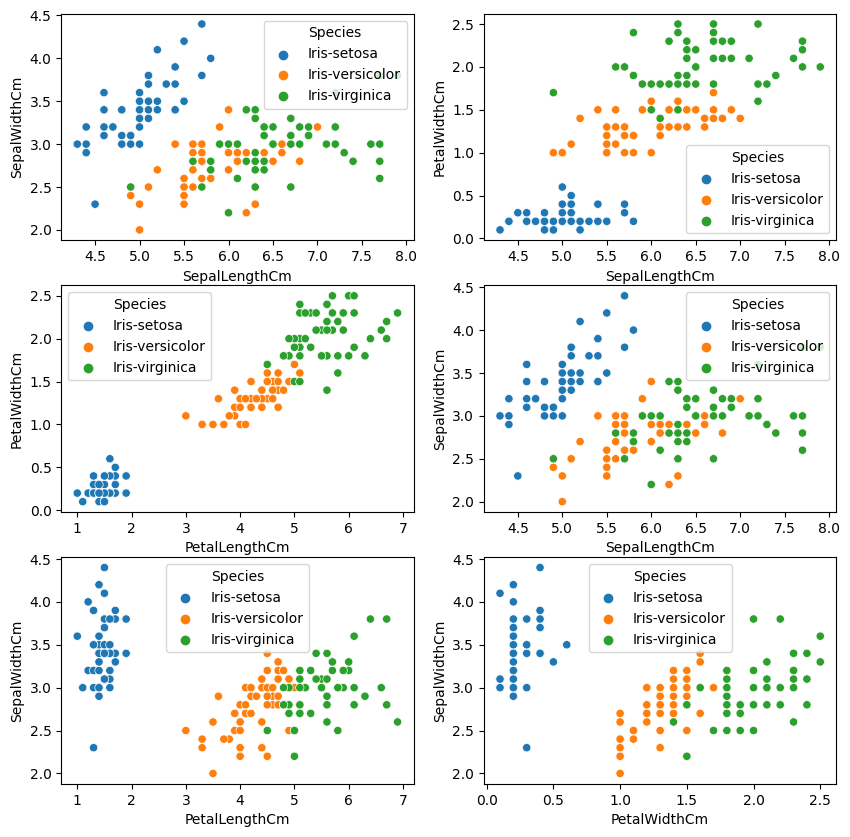

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (10,10))
sns.scatterplot(data=dados, x="SepalLengthCm", y="SepalWidthCm", hue="Species",ax=axes[0,0])
sns.scatterplot(data=dados, x="SepalLengthCm", y="PetalWidthCm", hue="Species",ax=axes[0,1])
sns.scatterplot(data=dados, x="PetalLengthCm", y="PetalWidthCm", hue="Species",ax=axes[1,0])
sns.scatterplot(data=dados, x="SepalLengthCm", y="SepalWidthCm", hue="Species",ax=axes[1,1])
sns.scatterplot(data=dados, x="PetalLengthCm", y="SepalWidthCm", hue="Species",ax=axes[2,0])
sns.scatterplot(data=dados, x="PetalWidthCm", y="SepalWidthCm", hue="Species",ax=axes[2,1])

[Text(0.5, 1.0, 'PetalWidthCm')]

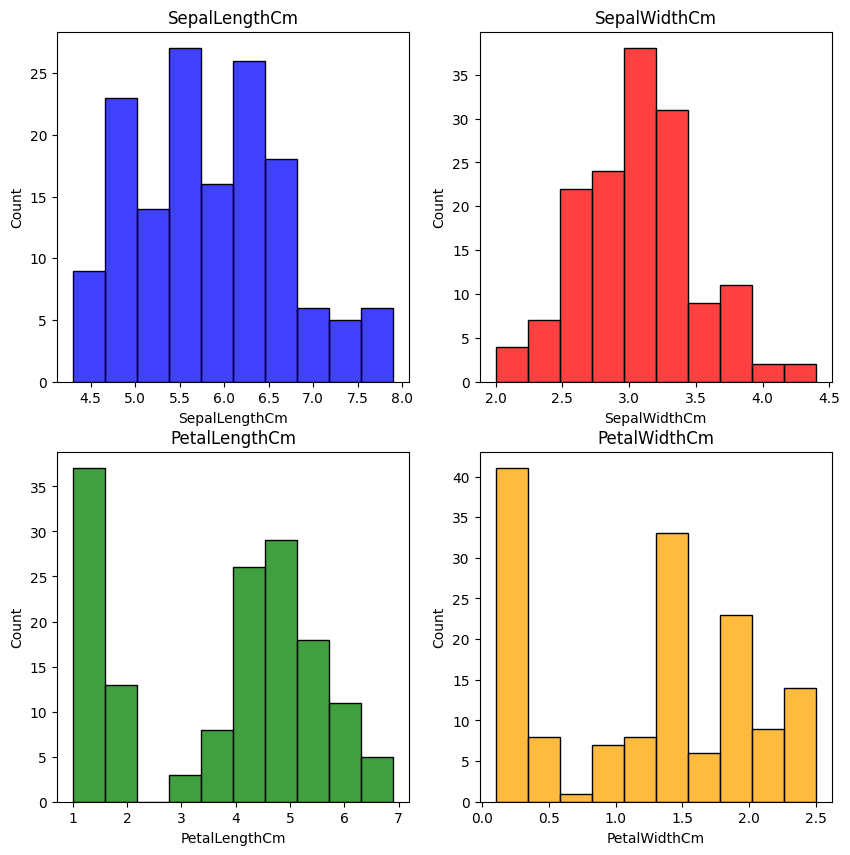

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10,10))
sns.histplot(dados['SepalLengthCm'], kde=False, bins=10, color='blue',ax=axes[0,0]).set(title="SepalLengthCm")
sns.histplot(dados['SepalWidthCm'], kde=False, bins=10, color='red',ax=axes[0,1]).set(title="SepalWidthCm")
sns.histplot(dados['PetalLengthCm'], kde=False, bins=10, color='green',ax=axes[1,0]).set(title="PetalLengthCm")
sns.histplot(dados['PetalWidthCm'], kde=False, bins=10, color='orange',ax=axes[1,1]).set(title="PetalWidthCm")

In [ ]:
media = dados['SepalLengthCm'].mean()
desv_pad = dados['SepalLengthCm'].std()
print(media, desv_pad)

5.843333333333334 0.828066127977863


In [ ]:
dados['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='PetalWidthCm'>

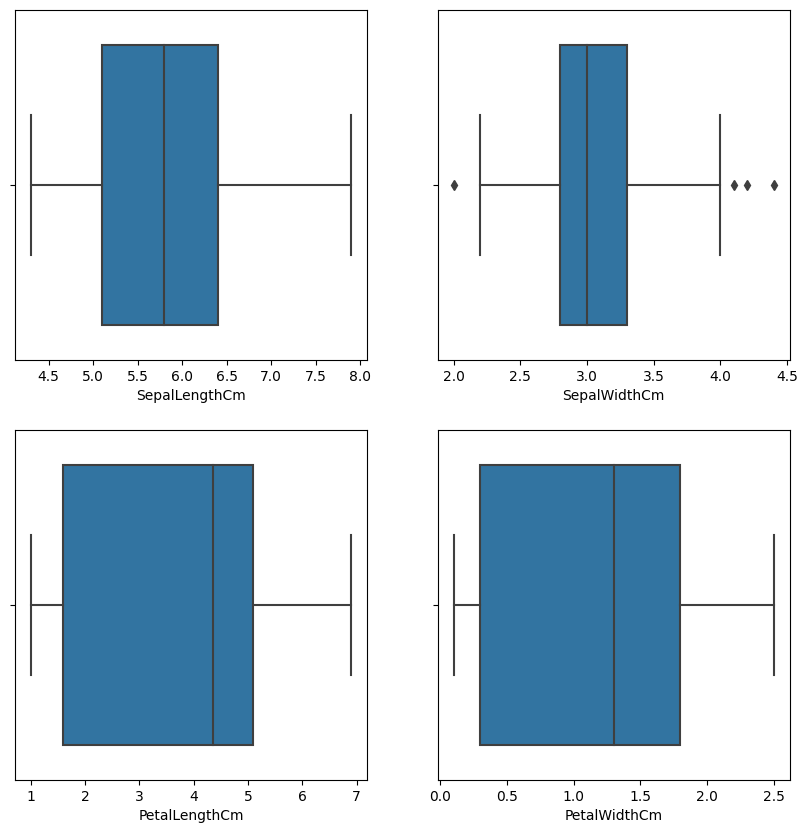

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (10,10
                                          ))
sns.boxplot(data=dados,x='SepalLengthCm',ax=axes[0,0])
sns.boxplot(data=dados,x='SepalWidthCm',ax=axes[0,1])
sns.boxplot(data=dados,x='PetalLengthCm',ax=axes[1,0])
sns.boxplot(data=dados,x='PetalWidthCm',ax=axes[1,1])

Existem pontos discrepantes referente a coluna SepalWidthCm

**Teste de Hipóteses:**
Esse conjunto de dados trata-se de uma amostra de 150 plantas. Logo qualquer hipótese que tivermos sobre ele é necessário aplicar um teste de hipóteses para validá-lo. Vamos analisar os seguintes cenários:
*   Fazer o teste para verificar se a média do "Petal Length Cm" é igual a 3,76. Hipotese nula e alternativa:
  * $H_{0}$: Em média o "Petal Length Cm" é igual a 3.76
  * $H_{a}$: Média é diferente de 3,76




In [ ]:
n = dados.shape[0]
n

150

In [ ]:
media = dados['PetalLengthCm'].mean()
desv_pad = dados['PetalLengthCm'].std()
print(media, desv_pad)

3.758666666666666 1.7644204199522626


In [ ]:
alpha = 0.05

In [ ]:
z = (media-3.76)/((desv_pad)/(n**0.5))
z
vp = norm.cdf(z,0,1)
vp
if(vp >= alpha):
  print("Não rejeito a hipotese numa")
else:
  print("Rejeita a hipotese nula")

Não rejeito a hipotese numa


(Caso bilateral - ver slides para checar como fazer esse teste de hipóteses)
*   Fazer o teste para verificar se 75% das plantas tem o "Petal Length Cm" menor que 5,1 cm (Teste de proporção). Hipotese nula e alternativa:
   * $H_{0}$: 75% das plantas tem o "Petal Length Cm" menor que 5,1 cm (Teste de proporção)
   * $H_{a}$: Menos de 75% das plantas tem o "Petal Length Cm" menor que 5,1 cm (Teste de proporção)

*   Testar com o teste de Shapiro-Wilk se os dados de cada uma das 4 medidas das plantas estão normalmente distribuídas.

In [ ]:
mask = dados['PetalLengthCm']<5.1
prop = dados[mask].shape[0]/dados.shape[0]
prop

0.72

In [ ]:
media = dados['PetalLengthCm'].mean()
desv_pad = dados['PetalLengthCm'].std()
print(media, desv_pad)

3.758666666666666 1.7644204199522626


In [ ]:
alpha = 0.05

In [ ]:
p = (prop-0.75)/(((0.75*(1-0.75))/(n))**0.5)
p

-0.8485281374238578

In [ ]:
vp = norm.cdf(p,0,1)
vp
if(vp >= alpha):
  print("Não rejeito a hipotese numa")
else:
  print("Rejeita a hipotese nula")

Não rejeito a hipotese numa
